# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

[Financial Inclusion in Africa Challenge](https://zindi.africa/competitions/financial-inclusion-in-africa/)

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
!pip install -q -U scikit-learn catboost xgboost lightgbm imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 4.0 MB/s eta 0:00:00


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [ ]:
# Data handling
import pandas as pd
import numpy as np 

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sb

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedGroupKFold, GroupShuffleSplit, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelBinarizer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier
import lightgbm as lgb
import catboost as cat
import xgboost as xgb

from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, f1_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle, warnings
from collections import Counter

warnings.filterwarnings('ignore')

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [ ]:
!gdown "1BbAgKLqnBM7C2_BU9nzPieN0b2dh0XLm" 
!unzip -o "financial-inclusion-in-africa.zip"

Downloading...
From: https://drive.google.com/uc?id=1BbAgKLqnBM7C2_BU9nzPieN0b2dh0XLm
To: /content/financial-inclusion-in-africa.zip
100% 420k/420k [00:00<00:00, 114MB/s]
Archive:  financial-inclusion-in-africa.zip
  inflating: StarterNotebook.ipynb   
  inflating: Train.csv               
  inflating: Test.csv                
  inflating: VariableDefinitions.csv  
  inflating: SampleSubmission.csv    


In [ ]:
# For CSV, use pandas.read_csv
DATASET_DIR = os.path.join(".", )
train = pd.read_csv(os.path.join(DATASET_DIR, 'Train.csv'))
test = pd.read_csv(os.path.join(DATASET_DIR, 'Test.csv'))
ss = pd.read_csv(os.path.join(DATASET_DIR, 'SampleSubmission.csv'))

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [ ]:
# Code here

In [ ]:
pd.read_csv(os.path.join(DATASET_DIR, 'VariableDefinitions.csv'))

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
train.describe(include=['O'])

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [ ]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
train.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


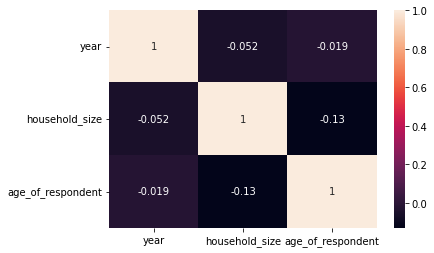

In [ ]:
sb.heatmap(train.corr(), annot=True)

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [ ]:
# Use pandas.DataFrame.drop_duplicates method
_ = train.shape[0]
train.drop_duplicates(inplace=True)
n_duplicated = _ - train.shape[0]
print("There is no duplicated rows in the dataset") if n_duplicated==0 else print(f"'{n_duplicated}' duplicated rows in the dataset")

There is no duplicated rows in the dataset


## Dataset Splitting

In [ ]:
# Please specify 
to_ignore_cols = [
    "uniqueid", # ID
    "",
]

In [ ]:
num_cols = list(set(test.select_dtypes('number')).intersection(train.select_dtypes('number')) - set(to_ignore_cols))
cat_cols = list(set(test.select_dtypes(exclude='number')).intersection(train.select_dtypes(exclude='number')) - set(to_ignore_cols))
print(f"The '{len(num_cols)}' numeric columns are : {num_cols}\nThe '{len(cat_cols)}' categorical columns are : {cat_cols}" )

plausible_targets = list(set(train) - set(test))
print(f"The '{len(plausible_targets)}' plausible target columns are : {plausible_targets}")
plausible_targets_dict = {i:col for (i,col) in enumerate(plausible_targets) }
target_col = plausible_targets[0] if len(plausible_targets)==1 else plausible_targets[int(input(f"Please enter the index of your target, {plausible_targets_dict}\n>"))]
print(f"The target is : {target_col}")

The '3' numeric columns are : ['year', 'age_of_respondent', 'household_size']
The '8' categorical columns are : ['location_type', 'cellphone_access', 'relationship_with_head', 'job_type', 'education_level', 'marital_status', 'gender_of_respondent', 'country']
The '1' plausible target columns are : ['bank_account']
The target is : bank_account


In [ ]:
X = train[num_cols+cat_cols]
y = train[target_col]

X_test = test[num_cols+cat_cols]

In [ ]:
# Use train_test_split with a random_state, and add stratify for Classification
stratify = y if y.dtype == "O" else None
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = stratify )

X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((18819, 11), (18819,), (4705, 11), (4705,))

## Impute Missing Values

In [ ]:
# Use sklearn.impute.SimpleImputer

In [ ]:
num_imputer = SimpleImputer(strategy="mean").fit(X_train[num_cols])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(X_train[cat_cols])

In [ ]:
# num_imputer = SimpleImputer(strategy="mean")
# num_imputer.fit(X_train[num_cols]) # return the fitted exact SimpleImputer()

In [ ]:
num_imputer.transform(X_train[num_cols])

array([[2.017e+03, 5.500e+01, 4.000e+00],
       [2.018e+03, 4.000e+01, 2.000e+00],
       [2.018e+03, 2.500e+01, 4.000e+00],
       ...,
       [2.017e+03, 2.500e+01, 2.000e+00],
       [2.017e+03, 6.500e+01, 3.000e+00],
       [2.018e+03, 5.800e+01, 5.000e+00]])

In [ ]:
X_train_num_imputed = pd.DataFrame(num_imputer.transform(X_train[num_cols]), columns=num_cols)
X_eval_num_imputed = pd.DataFrame(num_imputer.transform(X_eval[num_cols]), columns=num_cols)
X_test_num_imputed = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

X_train_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train[cat_cols]), columns=cat_cols)
X_eval_cat_imputed = pd.DataFrame(cat_imputer.transform(X_eval[cat_cols]), columns=cat_cols)
X_test_cat_imputed = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_eval_imputed = pd.concat([X_eval_num_imputed, X_eval_cat_imputed], axis=1)
X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)

In [ ]:
X_train_imputed.head()

,year,age_of_respondent,household_size,location_type,cellphone_access,relationship_with_head,job_type,education_level,marital_status,gender_of_respondent,country
0,2017.0,55.0,4.0,Rural,Yes,Spouse,Self employed,Primary education,Single/Never Married,Female,Tanzania
1,2018.0,40.0,2.0,Urban,Yes,Head of Household,Informally employed,Secondary education,Married/Living together,Female,Kenya
2,2018.0,25.0,4.0,Rural,Yes,Child,Farming and Fishing,Tertiary education,Single/Never Married,Male,Kenya
3,2017.0,50.0,3.0,Urban,No,Spouse,Self employed,No formal education,Single/Never Married,Female,Tanzania
4,2018.0,22.0,4.0,Urban,Yes,Child,Self employed,Secondary education,Single/Never Married,Male,Kenya


## New Features Creation

In [ ]:
# Code here

## Features Encoding




In [ ]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

In [ ]:
["male", "female"] # [[0, 1], [1,0]]

['male', 'female']

In [ ]:
encoder = OneHotEncoder(sparse=False, drop="first").fit(\
    X_train_cat_imputed.append(X_eval_cat_imputed)\
    .append(X_test_cat_imputed)\
    )
all_categories = encoder.categories_
cat_encoded_cols = encoder.get_feature_names_out().tolist()


In [ ]:
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat_imputed), columns=cat_encoded_cols)
X_eval_cat_encoded = pd.DataFrame(encoder.transform(X_eval_cat_imputed), columns=cat_encoded_cols)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat_imputed), columns=cat_encoded_cols)

In [ ]:
encoder = OneHotEncoder(
    categories=encoder.categories_, sparse_output=False, drop="first", handle_unknown="ignore"
            )

In [ ]:
encoder.categories

[array(['Rural', 'Urban'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Child', 'Head of Household', 'Other non-relatives',
        'Other relative', 'Parent', 'Spouse'], dtype=object),
 array(['Dont Know/Refuse to answer', 'Farming and Fishing',
        'Formally employed Government', 'Formally employed Private',
        'Government Dependent', 'Informally employed', 'No Income',
        'Other Income', 'Remittance Dependent', 'Self employed'],
       dtype=object),
 array(['No formal education', 'Other/Dont know/RTA', 'Primary education',
        'Secondary education', 'Tertiary education',
        'Vocational/Specialised training'], dtype=object),
 array(['Divorced/Seperated', 'Dont know', 'Married/Living together',
        'Single/Never Married', 'Widowed'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)]

## Features Scaling


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

In [ ]:
scaler = RobustScaler().fit(X_train_num_imputed)

In [ ]:
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num_imputed), columns=num_cols)
X_eval_num_scaled = pd.DataFrame(scaler.transform(X_eval_num_imputed), columns=num_cols)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num_imputed), columns=num_cols)

In [ ]:
X_train_ready = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_eval_ready = pd.concat([X_eval_num_scaled, X_eval_cat_encoded], axis=1)
X_test_ready = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [ ]:
X_train_ready.head()

,year,age_of_respondent,household_size,location_type_Urban,cellphone_access_Yes,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,...,education_level_Tertiary education,education_level_Vocational/Specialised training,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,gender_of_respondent_Male,country_Rwanda,country_Tanzania,country_Uganda
0,0.0,0.869565,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.5,0.217391,-0.333333,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,-0.434783,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.652174,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.5,-0.565217,0.333333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_eval_ready.head()

,year,age_of_respondent,household_size,location_type_Urban,cellphone_access_Yes,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,...,education_level_Tertiary education,education_level_Vocational/Specialised training,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,gender_of_respondent_Male,country_Rwanda,country_Tanzania,country_Uganda
0,-0.5,-0.086957,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.5,0.521739,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,-0.565217,-0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.5,1.652174,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,-0.434783,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test.head()

,year,age_of_respondent,household_size,location_type,cellphone_access,relationship_with_head,job_type,education_level,marital_status,gender_of_respondent,country
0,2018,30,3,Urban,Yes,Head of Household,Formally employed Government,Secondary education,Married/Living together,Male,Kenya
1,2018,51,7,Urban,Yes,Head of Household,Formally employed Private,Vocational/Specialised training,Married/Living together,Male,Kenya
2,2018,77,3,Rural,No,Parent,Remittance Dependent,No formal education,Married/Living together,Female,Kenya
3,2018,39,6,Rural,No,Head of Household,Remittance Dependent,Primary education,Married/Living together,Female,Kenya
4,2018,16,3,Urban,No,Child,Remittance Dependent,Secondary education,Single/Never Married,Male,Kenya


In [ ]:
# feature pipelines
num_pipe = Pipeline( steps=[("num_imputer", num_imputer), ("scaler", scaler)])
cat_pipe = Pipeline( steps=[("cat_imputer", cat_imputer), ("encoder", encoder)])

# end2end features preprocessor
preprocessor = ColumnTransformer(
    (
        ("numerical", num_pipe, num_cols),
        ("categorical", cat_pipe, cat_cols,),
    ),
    # verbose_feature_names_out=False,
)
preprocessor.set_output(transform="pandas")

# end2end pipeline
clf = Pipeline([('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])
clf.set_output(transform="pandas")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=(('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['year', 'age_of_respondent',
                                                   'household_size']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(categories=[array(['Rural', 'Urban'], dt...
       'Single/Never Married', 'Widowed'], dtype=object),
                                                                                             array(['Female', 'Male'], dtype=object),
                                                                                             array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['location_type',
                                                   'cellphone_access',
                                                   'relationship_with_head',
                                                   'job_type',
                                                   'education_level',
                                                   'marital_status',
                                                   'gender_of_respondent',
                                                   'country'])))),
                ('classifier', KNeighborsClassifier())])

## Optional: Train Dataset Balancing 

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

In [ ]:
models_trained = []

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.__str__()

'KNeighborsClassifier()'

### Train the Model

In [ ]:
# Use the .fit method

In [ ]:
knn.fit(X_train_ready, y_train)

KNeighborsClassifier()

In [ ]:
models_trained.append(knn)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

In [ ]:
y_eval_pred = knn.predict(X_eval_ready)

In [ ]:
print(classification_report(y_true=y_eval, y_pred=y_eval_pred,
                    #   labels=None, target_names=None, 
                      ))

              precision    recall  f1-score   support

          No       0.90      0.96      0.93      4043
         Yes       0.58      0.35      0.44       662

    accuracy                           0.87      4705
   macro avg       0.74      0.66      0.68      4705
weighted avg       0.86      0.87      0.86      4705



### Predict on an unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

In [ ]:
ada = AdaBoostClassifier()

### Train the Model

In [ ]:
# Use the .fit method

In [ ]:
ada.fit(X_train_ready, y_train)

AdaBoostClassifier()

In [ ]:
models_trained.append(ada)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [ ]:
metric = f1_score

In [ ]:
info = [ {"Model_Name": model.__str__(),
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval_ready),
              pos_label="Yes"
              ),
          } for model in models_trained ]

In [ ]:
info

[{'Model_Name': 'KNeighborsClassifier()',
  'Metric (f1_score)': 0.44048734770384257},
 {'Model_Name': 'AdaBoostClassifier()',
  'Metric (f1_score)': 0.44193216855087364}]

In [ ]:
pd.DataFrame(info).sort_values(ascending=False, by=f"Metric ({metric.__name__})")

,Model_Name,Metric (f1_score)
1,AdaBoostClassifier(),0.441932
0,KNeighborsClassifier(),0.440487


## Cross validation

In [ ]:
def metric(gt, pred, thr=0.5):
    pred = (pred >= thr).astype(int)
    return f1_score(gt, pred,)

In [ ]:
n_splits = 10
splitter = StratifiedKFold
folds = splitter(n_splits=n_splits, shuffle=True, random_state=0)

In [ ]:
lb = LabelBinarizer().fit(y.values)

In [ ]:
class_to_idx = { 
    "No": 0 ,
    "Yes": 1 ,
    }


# y.map(class_to_idx)

***********************************
Fold 0
-------------------- LGBMClassifier(learning_rate=0.01, n_estimators=10000) --------------------
[100]	valid_0's binary_logloss: 0.313452
[200]	valid_0's binary_logloss: 0.294694
[300]	valid_0's binary_logloss: 0.288891
[400]	valid_0's binary_logloss: 0.287524
[500]	valid_0's binary_logloss: 0.287063
[600]	valid_0's binary_logloss: 0.287452
F1 score: 0.4721689059500959
Gt Stats: Counter({0: 2021, 1: 332})
Pr Stats: Counter({0: 2164, 1: 189})
              precision    recall  f1-score   support

          No       0.90      0.97      0.93      2021
         Yes       0.65      0.37      0.47       332

    accuracy                           0.88      2353
   macro avg       0.78      0.67      0.70      2353
weighted avg       0.87      0.88      0.87      2353

-----------------------------------

-------------------- <catboost.core.CatBoostClassifier object at 0x7f8e1cad6b20> --------------------
0:	learn: 0.6827274	test: 0.6826755	best: 0.6

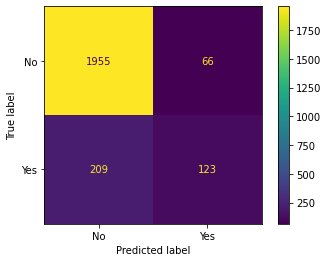

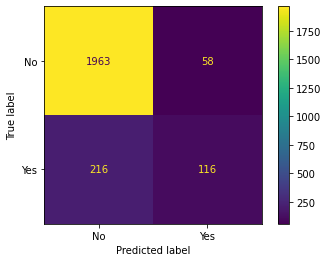

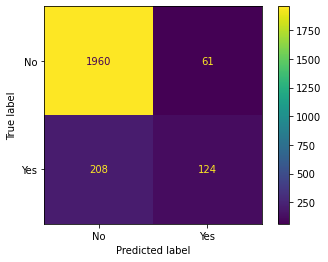

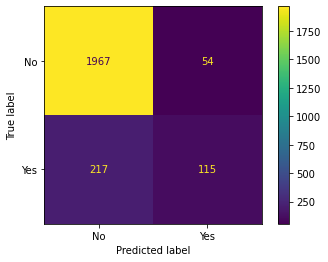

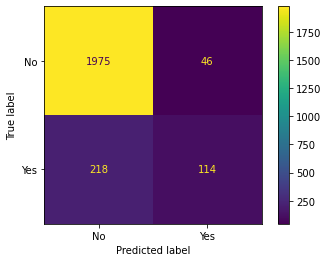

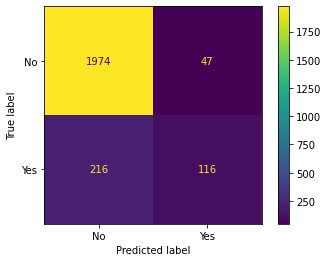

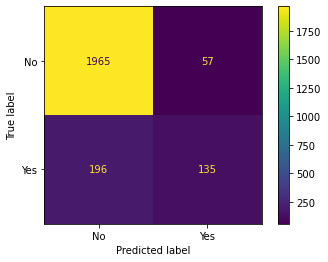

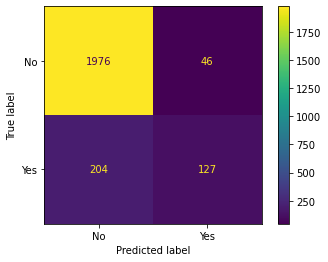

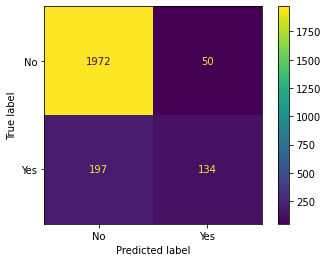

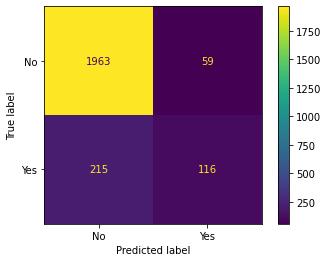

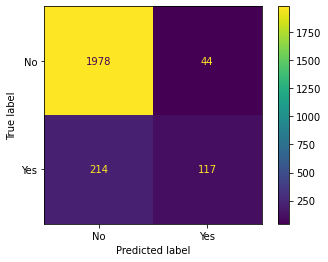

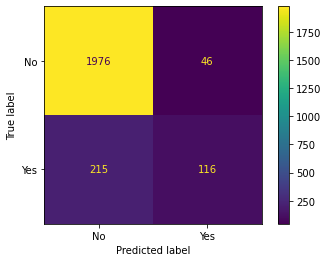

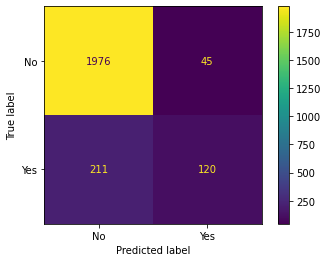

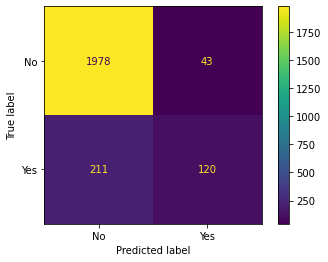

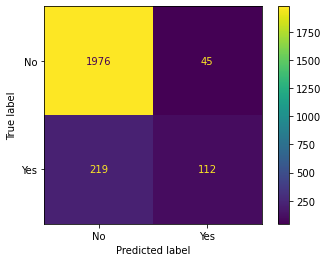

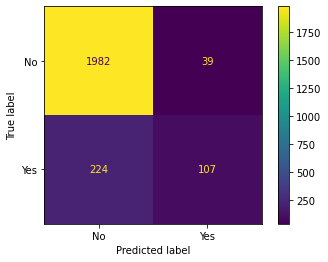

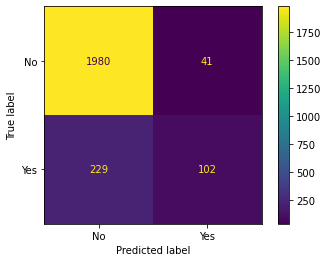

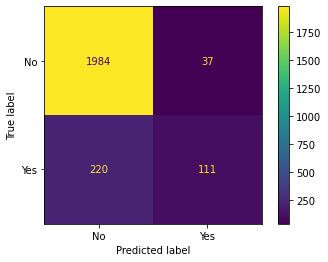

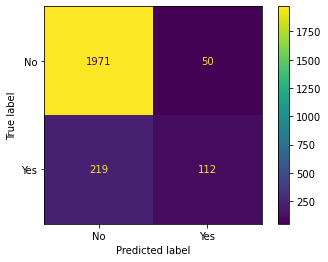

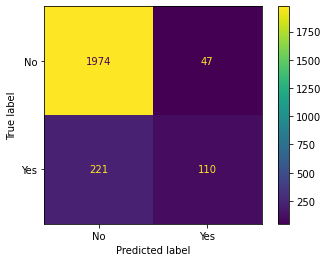

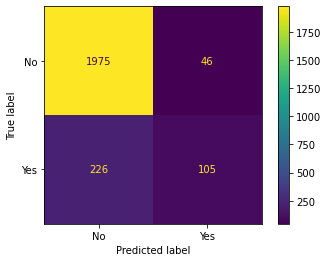

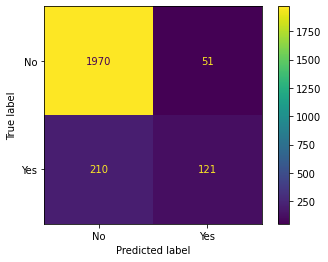

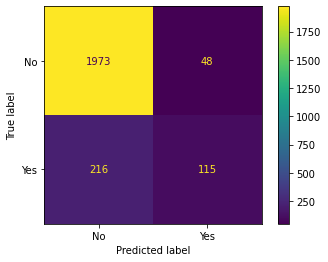

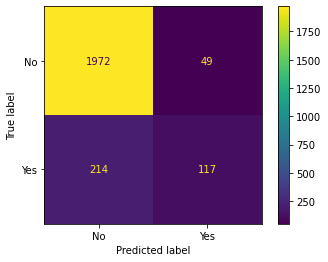

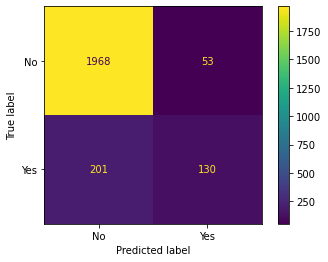

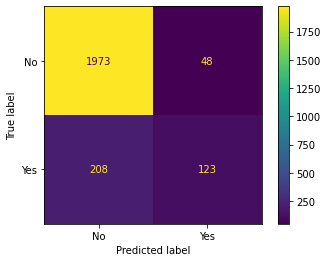

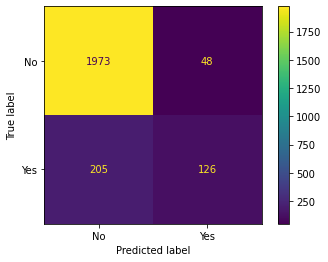

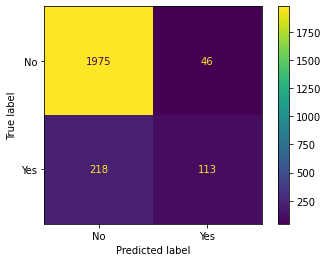

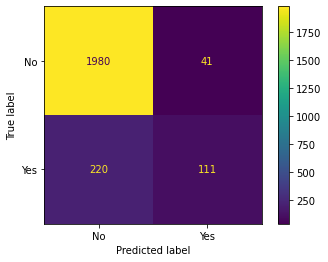

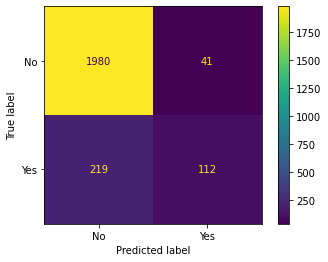

In [ ]:
score = 0
scores_ = {"lgbm": [], "cat": [], "xgb": [], }
scores = []
oof = [] 
oof_test = []
thr = 0.5

for fold, (train_index, eval_index) in enumerate(folds.split(X, y)):
    print('*'*35)
    print('Fold', fold)

    X_trainset, y_trainset  = preprocessor.fit_transform(X.iloc[train_index]), y[train_index].map(class_to_idx)
    X_evalset, y_evalset  = preprocessor.transform(X.iloc[eval_index]), y[eval_index].map(class_to_idx)
    testset = preprocessor.transform(test)

    # # end2end pipeline
    # pipe = Pipeline([('preprocessor', preprocessor),
    #                   ('model', KNeighborsClassifier())])
    # # model.set_output(transform="pandas")
    
    # MODEL #001
    model_001 = lgb.LGBMClassifier(n_estimators=10000, learning_rate=0.01)
    model_002 = cat.CatBoostClassifier(n_estimators=10000, learning_rate=0.01)
    model_003 = xgb.XGBClassifier(n_estimators=10000, learning_rate=0.01)
    
    for model in [model_001, model_002, model_003]:
        print("-"*20, model.__str__(),"-"*20)
        model.fit(X_trainset, y_trainset,
                eval_set=[(X_evalset, y_evalset)], 
                early_stopping_rounds=100,
                verbose=100,
                )
        pred = model.predict_proba(X_evalset)
        sc = metric(y_evalset, pred[:, 1], thr)

        oof.extend(pred[:, 1])
        oof_test.append(model.predict_proba(testset)[:, 1])

        score += sc / (n_splits*3)
        scores.append(sc)



        print("F1 score:", sc)
        print("Gt Stats:", Counter(y_evalset))
        print("Pr Stats:", Counter((pred[:, 1] >= thr).astype(int)))
        print(classification_report(y_evalset, (pred[:, 1] >= thr).astype(int), target_names=lb.classes_))
        ConfusionMatrixDisplay.from_predictions(y_evalset, (pred[:, 1] >= thr).astype(int), display_labels=lb.classes_)

        print('-'*35)
        print()

    print('*'*35)
    print()

print('Avg F1-Score: ', score)

In [ ]:
# ConfusionMatrixDisplay.from_predictions(y_evalset, (pred[:, 1] >= thr).astype(int), display_labels=lb.classes_)


In [ ]:
# RocCurveDisplay.from_predictions(y_evalset, (pred[:, 1] >= thr).astype(int), )


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [ ]:
# components = {
#     "num_imputer": None,
#     "cat_imputer": None,
#     "encoder": None,
#     "scaler": None,
#     "models": models_trained,
# }

In [ ]:
# with open("ml.pkl", "wb") as f :
#     pickle.dump(components, f)

# Submission


In [ ]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [ ]:
sub = pd.DataFrame()

In [ ]:
sub[ss.columns[0]] = test['uniqueid'] + " x " + test['country'] 
sub.head()

,unique_id
0,uniqueid_6056 x Kenya
1,uniqueid_6060 x Kenya
2,uniqueid_6065 x Kenya
3,uniqueid_6072 x Kenya
4,uniqueid_6073 x Kenya


,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


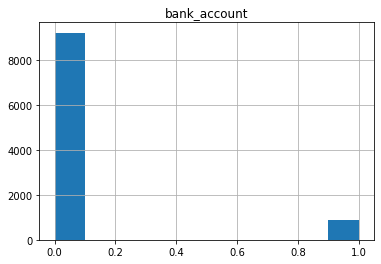

In [ ]:
test_thr = 0.44
sub[ss.columns[1]] = (np.mean(oof_test, axis=0) >= test_thr).astype(int)
sub.hist()
sub.head()

In [ ]:
sub.to_csv("s_catboost.csv", index=False)

In [ ]:
sub.to_csv("s_cat-xgb-lgbm.csv", index=False)

https://datascience.stackexchange.com/questions/103077/how-can-i-get-the-dataframe-after-scikit-pipeline